<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-Nearest Neighbors (KNN) Algorithm**

In KNN algorithm, a sample is classified by a popularity vote of its nearest neighbors. 

To predict a new sample in KNN, all the distances from the new sample to the training samples are calculated using the **Euclidean Distance** method. Then, a majority vote is considered to identify the nearest neighbors and finally, the most common class label is chosen for the new sample. 

For example, we have two classes: **blue** and **orange** in a two dimensional feature vector with some training samples. We have one new sample that we want to classify. Lets say the new sample has three nearest neighbors: two of them are from the **blue** class and the third one is from **orange** class. So here, the label of the new sample will be **blue**. 

### **Import Iris Dataset**

In [26]:
# import libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# print data samples
print('X: ', X_train.shape)
print('Sample of X:', X_train[0])
print('y: ', y_train.shape)
print('Sample of y:', y_train[0])

X:  (120, 4)
Sample of X: [5.1 2.5 3.  1.1]
y:  (120,)
Sample of y: 1


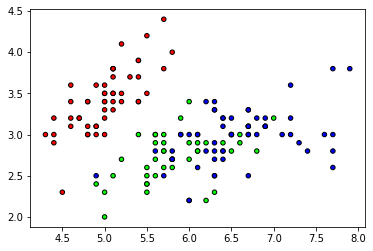

In [ ]:
# plot data samples
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)

### **KNN from scratch**

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [32]:
# train the model
clf = KNN(k=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# model accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)
print('Accuracy', accuracy*100, '%')

Accuracy 100.0 %


In [30]:
# classification report
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



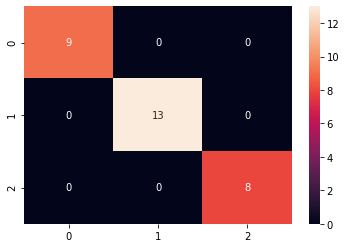

In [31]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### **KNN using scikit-learn**

In [33]:
# train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# model accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy = accuracy*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.


In [34]:
# classification report
print(classification_report(y, knn.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



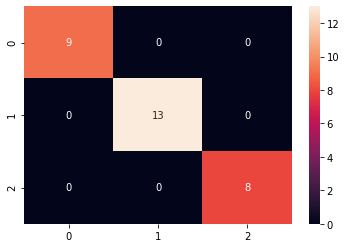

In [35]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### **Evaluate Alternate Values of K for Better Prediction**

These two graphs represent the performance of the model on alternate possible values of K. In this case, the model gets highest accuracy and lowest mean error when K = 1, 2, 3, 4, 6, 8 or 9. It gets 96.67% accuracy and 0.035 mean error when K = 5 or 7. 

In [ ]:
error = []
accuracy = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Model Accuracy')

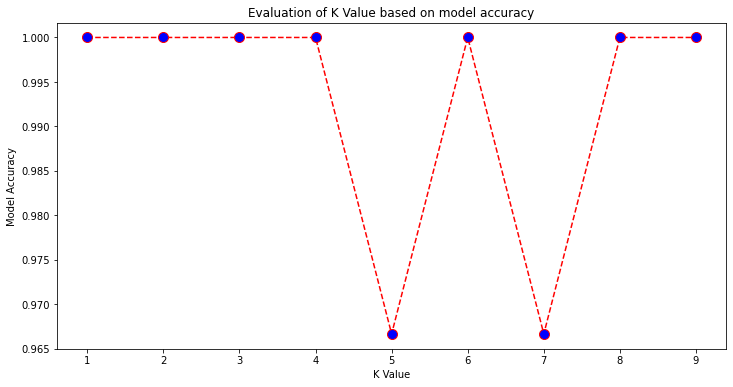

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Evaluation of K Value based on model accuracy')
plt.xlabel('K Value')
plt.ylabel('Model Accuracy')

Text(0, 0.5, 'Mean Error')

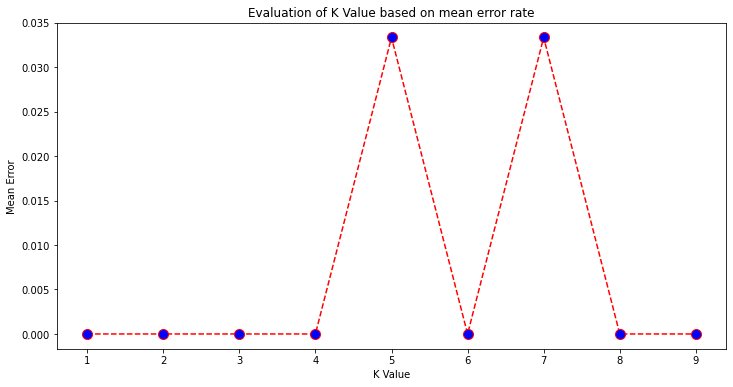

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Evaluation of K Value based on mean error rate')
plt.xlabel('K Value')
plt.ylabel('Mean Error')